In [ ]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [12]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

Text(0.5, 1.0, '0')

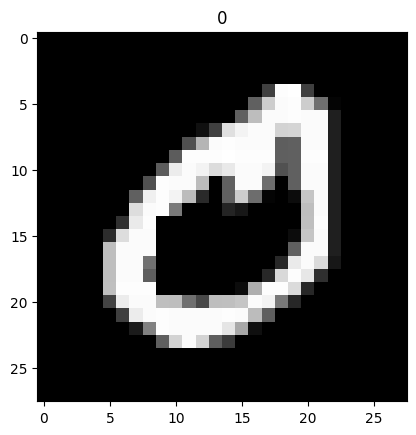

In [13]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [14]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [16]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [ ]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784)) # camada de entrada
modelo.add(Dropout(0.2)) # 20% dos neurônios serão zerados
modelo.add(Dense(units = 64, activation = 'relu')) # camada oculta 
modelo.add(Dropout(0.2)) # 20% dos neurônios serão zerados
modelo.add(Dense(units = 64, activation = 'relu')) # camada oculta
modelo.add(Dropout(0.2)) # 20% dos neurônios serão zerados
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax')) # camada de saída

In [21]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7680 - loss: 0.7216 - val_accuracy: 0.9487 - val_loss: 0.1631
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9312 - loss: 0.2362 - val_accuracy: 0.9576 - val_loss: 0.1418
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9451 - loss: 0.1908 - val_accuracy: 0.9678 - val_loss: 0.1139
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9512 - loss: 0.1695 - val_accuracy: 0.9692 - val_loss: 0.1100
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9539 - loss: 0.1555 - val_accuracy: 0.9692 - val_loss: 0.1037
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9583 - loss: 0.1392 - val_accuracy: 0.9684 - val_loss: 0.1048
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9613 - loss: 0.1324 - val_accuracy: 0.9707 - val_loss: 0.0991
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9651 - loss: 0.1200 - 

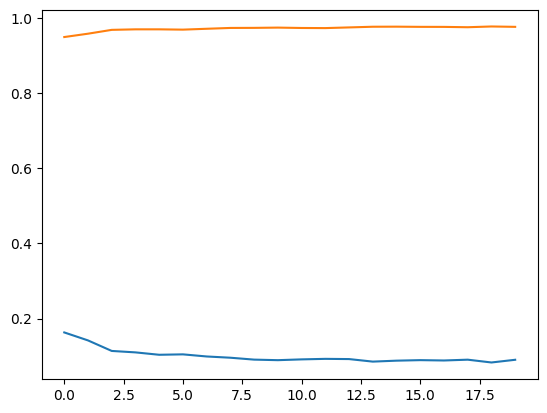

In [23]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [24]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[5.21271826e-09, 1.63039591e-08, 1.93677550e-07, ...,
        9.99994397e-01, 1.30621680e-09, 4.39906808e-06],
       [1.29655715e-12, 1.20596951e-06, 9.99998569e-01, ...,
        2.62862843e-10, 1.02737046e-08, 1.84094154e-16],
       [1.96257854e-08, 9.99996305e-01, 6.84288821e-08, ...,
        7.64569563e-07, 2.56206386e-06, 4.74620743e-09],
       ...,
       [2.04740196e-12, 5.81054049e-09, 3.04370557e-11, ...,
        1.43477934e-07, 3.42905926e-09, 3.44925502e-06],
       [1.73887744e-11, 1.89350299e-13, 2.79912080e-13, ...,
        1.51877089e-12, 4.82972027e-08, 5.16749665e-09],
       [3.55599176e-13, 2.73521444e-16, 4.20639897e-16, ...,
        2.44470645e-22, 9.31932500e-15, 6.98534770e-20]],
      shape=(10000, 10), dtype=float32)

In [25]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 969,    0,    0,    0,    2,    1,    4,    1,    2,    1],
       [   0, 1123,    2,    1,    0,    0,    4,    0,    5,    0],
       [   5,    1,  999,    7,    5,    0,    2,    6,    6,    1],
       [   0,    0,    4,  988,    0,    6,    0,    5,    3,    4],
       [   2,    0,    0,    0,  960,    0,    4,    3,    2,   11],
       [   4,    0,    1,    9,    2,  857,    6,    2,    6,    5],
       [   2,    3,    0,    2,    3,    3,  943,    0,    2,    0],
       [   2,    4,    8,    1,    1,    0,    0, 1005,    1,    6],
       [   4,    1,    2,   10,    4,    0,    2,    5,  943,    3],
       [   4,    3,    0,    2,   14,    7,    0,    7,    1,  971]])

In [26]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [27]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


[np.int64(4)]